<a href="https://colab.research.google.com/github/haiderzm/NeuralNetwithPyTorch/blob/master/ConvolutionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [0]:
t = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [4]:
train_set = datasets.MNIST(root = './data', train=True, transform=t, download = True)
test_set = datasets.MNIST(root = './data', train=False, transform=t, download = True)

0it [00:00, ?it/s]

9920512it [00:05, 1803683.09it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


32768it [00:00, 297867.95it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 5145129.98it/s]                           
8192it [00:00, 123562.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 64)

In [0]:
train_images, train_labels  = next(iter(train_loader))

tensor(5)


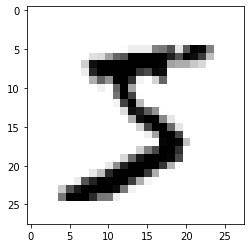

In [7]:
plt.imshow(train_images[0].squeeze(), cmap = 'binary')
print(train_labels[0])

In [0]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.maxpool = nn.MaxPool2d(2)
        self.drop_2d = nn.Dropout2d()

        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)


    def forward(self,x):

        x = F.relu(self.maxpool(self.conv1(x)))
        x = F.relu(self.maxpool(self.drop_2d(self.conv2(x))))

        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = self.fc2(x)

        return F.log_softmax(x)


In [0]:
is_cuda = torch.cuda.is_available()

In [10]:
is_cuda

True

In [15]:
model = Net()

model.to('cuda')

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop_2d): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

Now the training phase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


IndexError: ignored

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
device = 'cuda'

In [20]:
acc_arr = []
num_epochs=50
testing_loss=[]
training_loss=[]
def testset_accuracy(epoch):
    correct = 0
    total = 0
    testloss = 0
    
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            images,labels = images.to(device),labels.to(device)
            outputs = model(images)
            testloss+=criterion (outputs,labels)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        acc_arr.append(100*correct/total)
        testing_loss.append(testloss.item())
        print('Epoch :',epoch,'Test Accuracy : %d %%' %(100*correct/total))
        
        
for epoch in range(num_epochs):
    running_loss = 0
    for i,data in enumerate(train_loader,0):
        images,labels = data
        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
    training_loss.append(running_loss)
    testset_accuracy(epoch+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch : 1 Test Accuracy : 93 %
Epoch : 2 Test Accuracy : 94 %
Epoch : 3 Test Accuracy : 95 %
Epoch : 4 Test Accuracy : 95 %
Epoch : 5 Test Accuracy : 95 %
Epoch : 6 Test Accuracy : 95 %
Epoch : 7 Test Accuracy : 95 %
Epoch : 8 Test Accuracy : 96 %
Epoch : 9 Test Accuracy : 96 %
Epoch : 10 Test Accuracy : 96 %
Epoch : 11 Test Accuracy : 96 %
Epoch : 12 Test Accuracy : 96 %
Epoch : 13 Test Accuracy : 96 %
Epoch : 14 Test Accuracy : 96 %
Epoch : 15 Test Accuracy : 96 %
Epoch : 16 Test Accuracy : 96 %
Epoch : 17 Test Accuracy : 96 %
Epoch : 18 Test Accuracy : 96 %
Epoch : 19 Test Accuracy : 96 %
Epoch : 20 Test Accuracy : 96 %
Epoch : 21 Test Accuracy : 97 %
Epoch : 22 Test Accuracy : 96 %
Epoch : 23 Test Accuracy : 96 %


KeyboardInterrupt: ignored

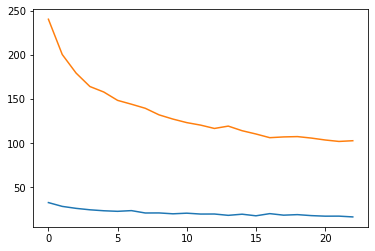

In [21]:
plt.plot(testing_loss,label='testing loss')
plt.plot(training_loss,label='training loss')

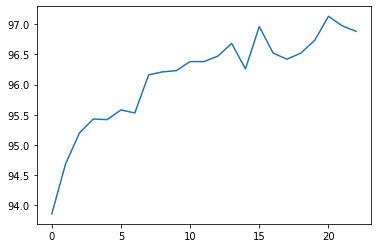

In [22]:
plt.plot(acc_arr)